<a href="https://colab.research.google.com/github/Adrieto/DataScience/blob/main/Vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# The files are read directly from the database in the urls
red = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
    delimiter=";",
)
white = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
    delimiter=";",
)

In [26]:
# We add a new column to identify whether the wine is red or white
red["hue"] = "red"
white["hue"] = "white"

In [33]:
# The dataframes are concatenated
df_original = pd.concat([red, white], ignore_index=True)

# And a copy is done:
df = df_original.copy()

In [35]:
# Let's make an exploratory analys of the data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,hue
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


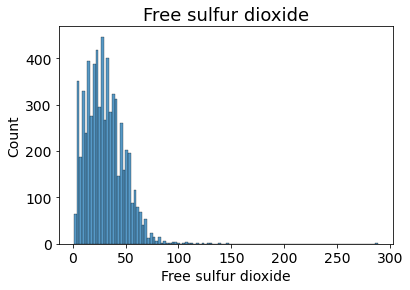

In [55]:
hist = sns.histplot(x="free sulfur dioxide", data=df)
hist.tick_params(labelsize=14)
hist.axes.set_title("Free sulfur dioxide", fontsize=18)
hist.set_xlabel("Free sulfur dioxide", fontsize=14)
hist.set_ylabel("Count", fontsize=14);

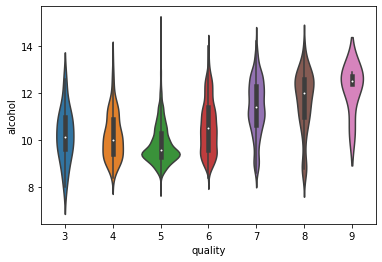

In [59]:
# Violin plot
sns.violinplot(x="quality", y="alcohol", data=df, palete="rainbow");

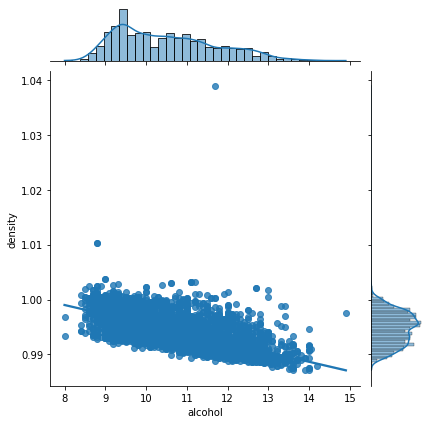

In [96]:
# Correlation analysis
joint_plt = sns.jointplot(x="alcohol", y="density", data=df, kind="reg")

In [73]:
# Pearson's correlation coefficient
from scipy.stats import pearsonr


def get_pearson(col1, col2, temp_df):
    pearson, p_value = pearsonr(temp_df[col1], temp_df[col2])
    print("La correlación entre {} y {} es {:.2f}".format(col1, col2, pearson))
    print("El P-valor de esta correlación es {:.1e}".format(p_value))
    # print (f"The pearson correlation coefficient between {col1} and {col2} is: {pearson}")
    # print (f"The p-value is {p_value}")


get_pearson("fixed acidity", "pH", df)

La correlación entre fixed acidity y pH es -0.25
El P-valor de esta correlación es 3.3e-95


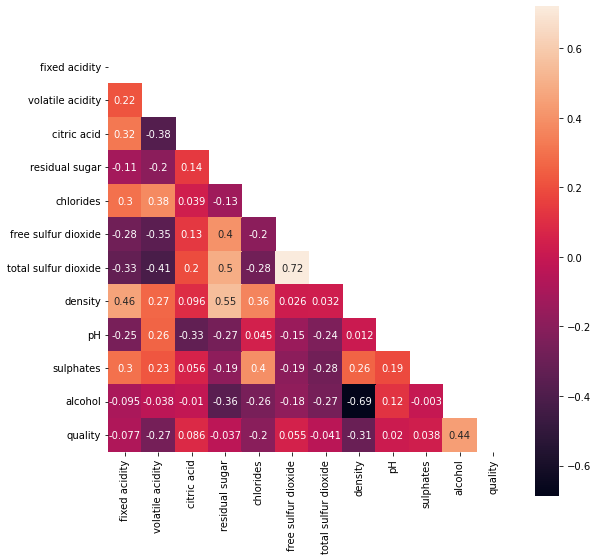

In [89]:
# Now we create a HeatMap with the Pearson coefficient of each pair of variables
correlation = df.corr(method="pearson")

# New figure and set of its size in matplotlib
fig = plt.gcf()
fig.set_size_inches(9, 9)

# Now we create a heat map with the upper triangle hidden
upper_triangle = np.triu(correlation)
sns.heatmap(correlation, mask=upper_triangle, annot=True, square=True);

In [88]:
# We can see the return of the method np.triu
up_trian = np.round(upper_triangle, 2)
print(up_trian)

[[ 1.    0.22  0.32 -0.11  0.3  -0.28 -0.33  0.46 -0.25  0.3  -0.1  -0.08]
 [ 0.    1.   -0.38 -0.2   0.38 -0.35 -0.41  0.27  0.26  0.23 -0.04 -0.27]
 [ 0.    0.    1.    0.14  0.04  0.13  0.2   0.1  -0.33  0.06 -0.01  0.09]
 [ 0.    0.    0.    1.   -0.13  0.4   0.5   0.55 -0.27 -0.19 -0.36 -0.04]
 [ 0.    0.    0.    0.    1.   -0.2  -0.28  0.36  0.04  0.4  -0.26 -0.2 ]
 [ 0.    0.    0.    0.    0.    1.    0.72  0.03 -0.15 -0.19 -0.18  0.06]
 [ 0.    0.    0.    0.    0.    0.    1.    0.03 -0.24 -0.28 -0.27 -0.04]
 [ 0.    0.    0.    0.    0.    0.    0.    1.    0.01  0.26 -0.69 -0.31]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    1.    0.19  0.12  0.02]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   -0.    0.04]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.44]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.  ]]


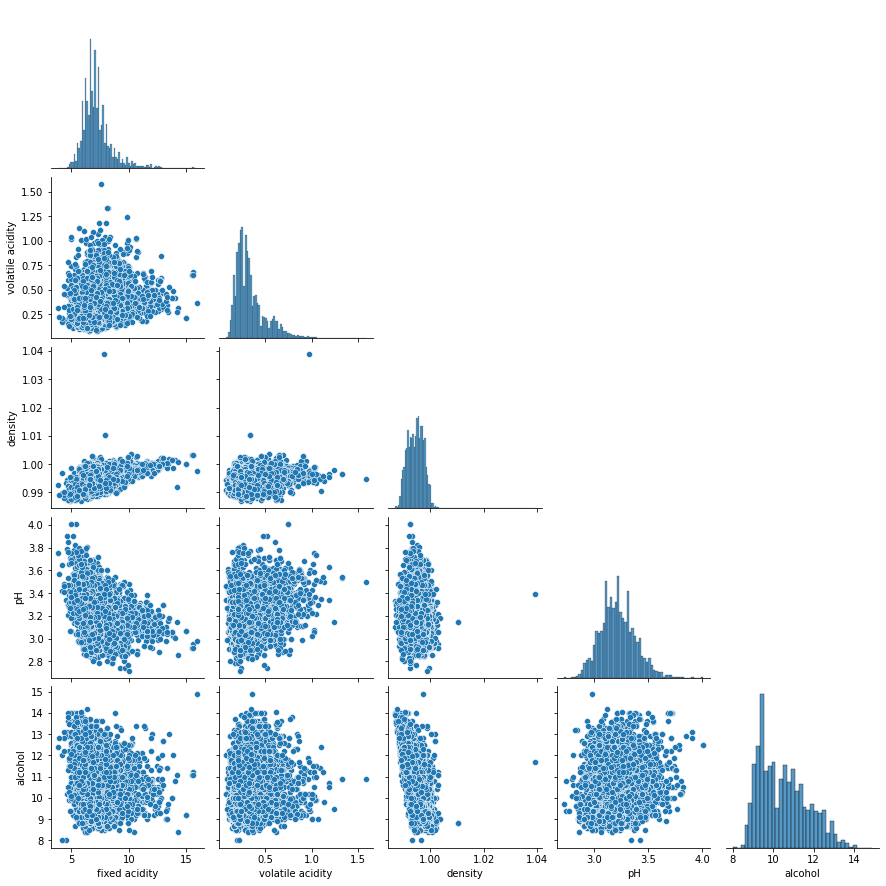

In [95]:
# Pair plots

sns.pairplot(
    df[["fixed acidity", "volatile acidity", "density", "pH", "alcohol"]], corner=True
);